<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.


                                                   ~ LOGISTICS

In [1]:
# Logistical variables
logistics = {'bg':'project background',
            'term':'terms and definitions',
            'obj': 'project objective',
            'satdict': 'SAT data in dictionary',
            'data_dict': 'information about my data',
            'df_verma': '10 states with the greatest gap between Verbal and Math scores, where Verbal scores are higher than math'}

In [2]:
# Background information
bg = {'bg':'''move the needle on one of two separate issues: high school education outcomes, 
      or drug abuse in the community'''}

terms = {'hypothesis': 'A theory that needs to be verified by experiments'}

obj = {'objective': 'Explore the data, find patterns, and conclude with a a few hypotheses for policy recommendation',
    'others':'Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions'}


                                                    ~IMPORT

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
state = []
rate = []
verbal = []
math = []

with open ('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        state.append(row['State'])
        rate.append(row['Rate'])
        math.append(row['Math'])
        verbal.append(row['Verbal'])
        
satdict = {'State': state,
       ' Rate': rate,
       'Verbal': verbal,
       'Math': math}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
df_0 = pd.DataFrame(satdict)
df_0.dtypes

 Rate     object
Math      object
State     object
Verbal    object
dtype: object

In [6]:
df = pd.read_csv('sat_scores.csv')
columns = df.columns
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
# Describes the north-eastern states in the US
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
data_dict = {'column names': ['state, rate, verbal, math'],
            'data type': ['object', 'int', 'int', 'int'],
            'description':{ 'state':'name of state',
                            'rate': 'some score',
                            'verbal': 'verbal score',
                            'math': 'math score'},
            'shape': (52,4)}
data_dict

{'column names': ['state, rate, verbal, math'],
 'data type': ['object', 'int', 'int', 'int'],
 'description': {'math': 'math score',
  'rate': 'some score',
  'state': 'name of state',
  'verbal': 'verbal score'},
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.distplot(df['Rate'], ax=axes[0], kde=False, bins=20)
sns.distplot(df['Math'], ax=axes[1], kde=False, bins=20)
sns.distplot(df['Verbal'], ax=axes[2], kde=False, bins=20)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [9]:
df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


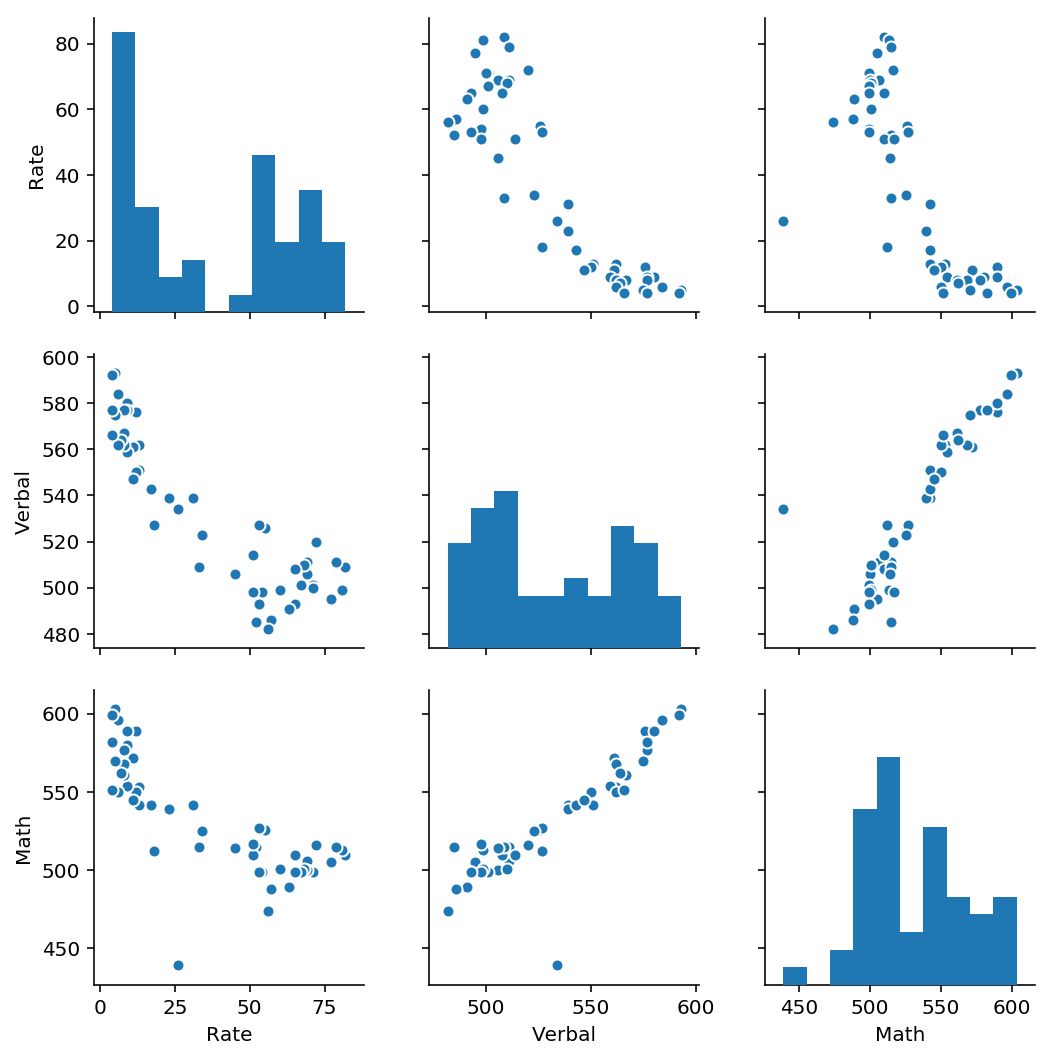

In [10]:
sns.pairplot(df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

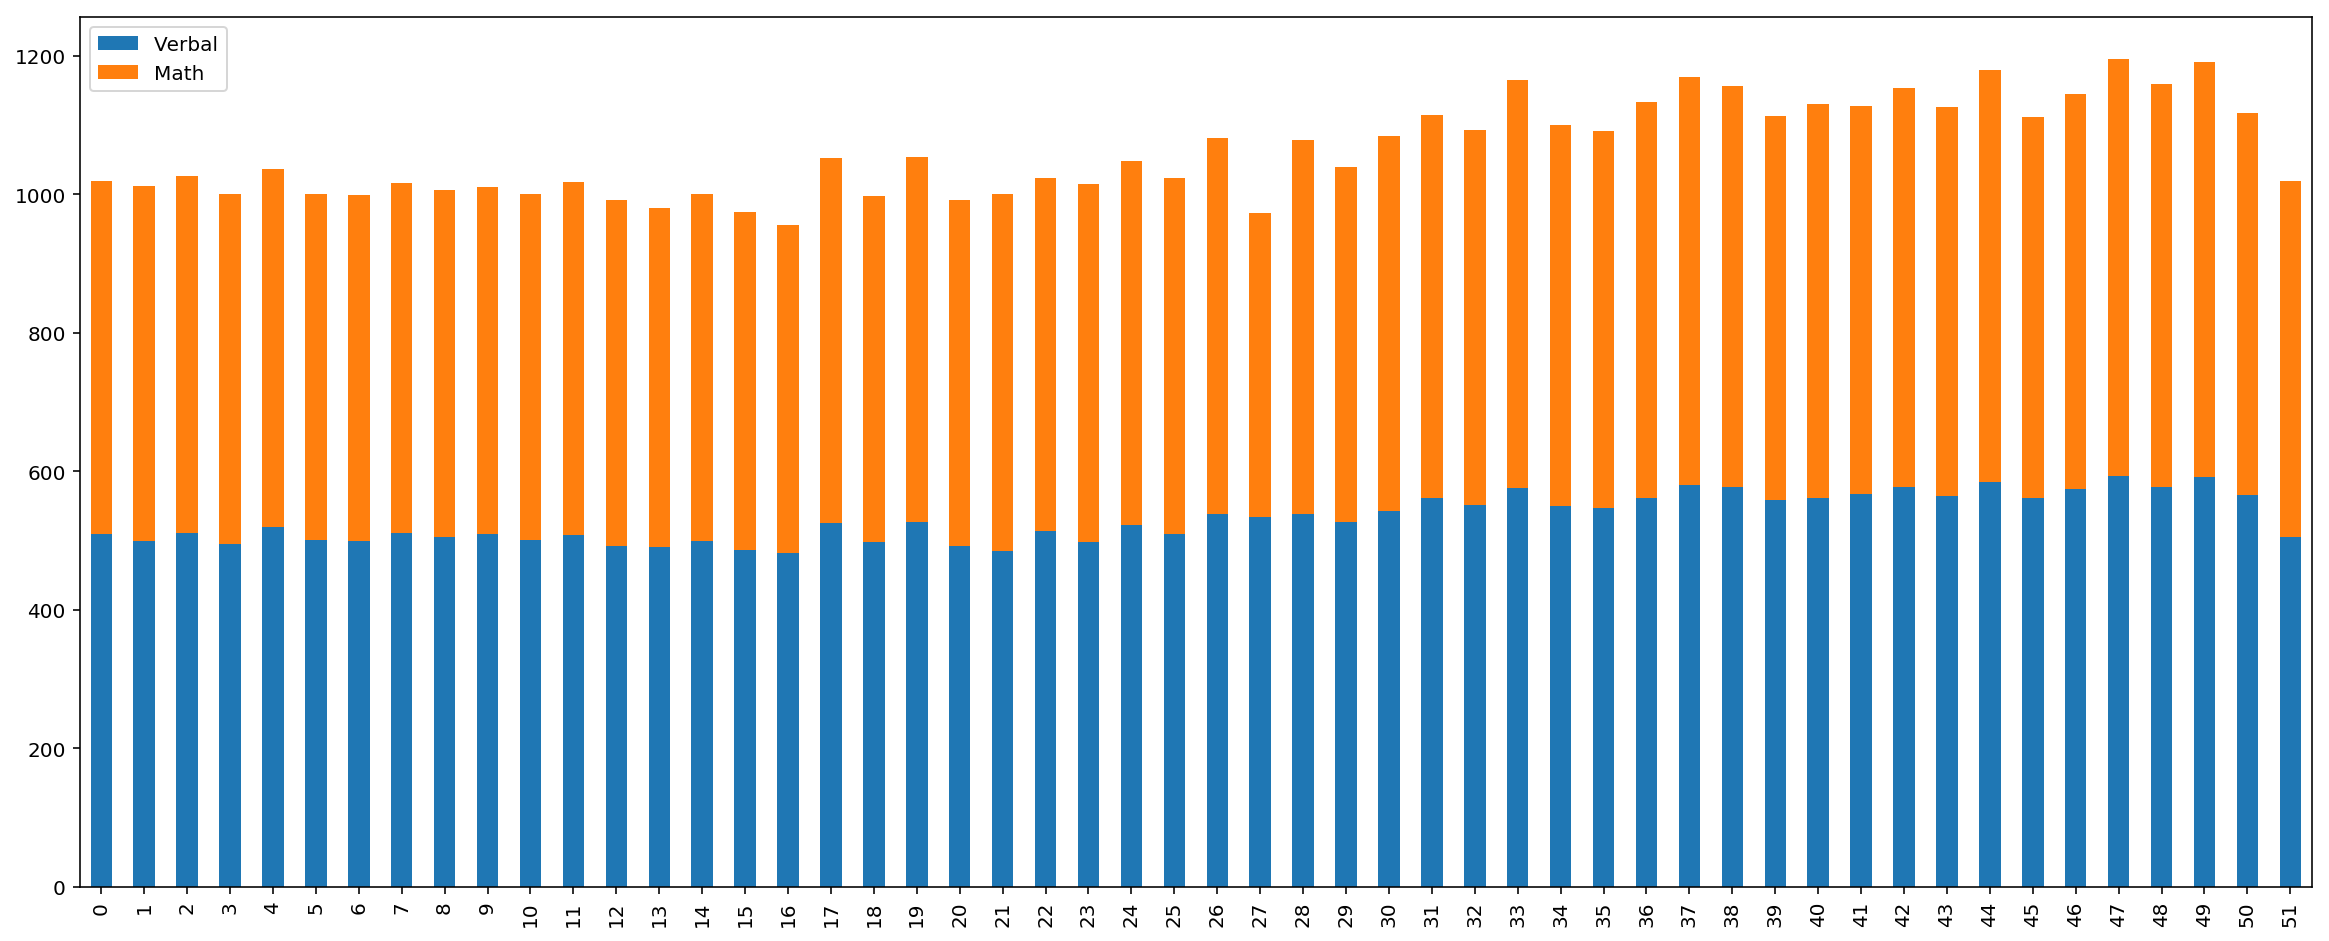

In [11]:
vermath = df.loc[:,['Verbal', 'Math']]
vermath.plot(kind='bar', stacked = True, figsize=(20,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

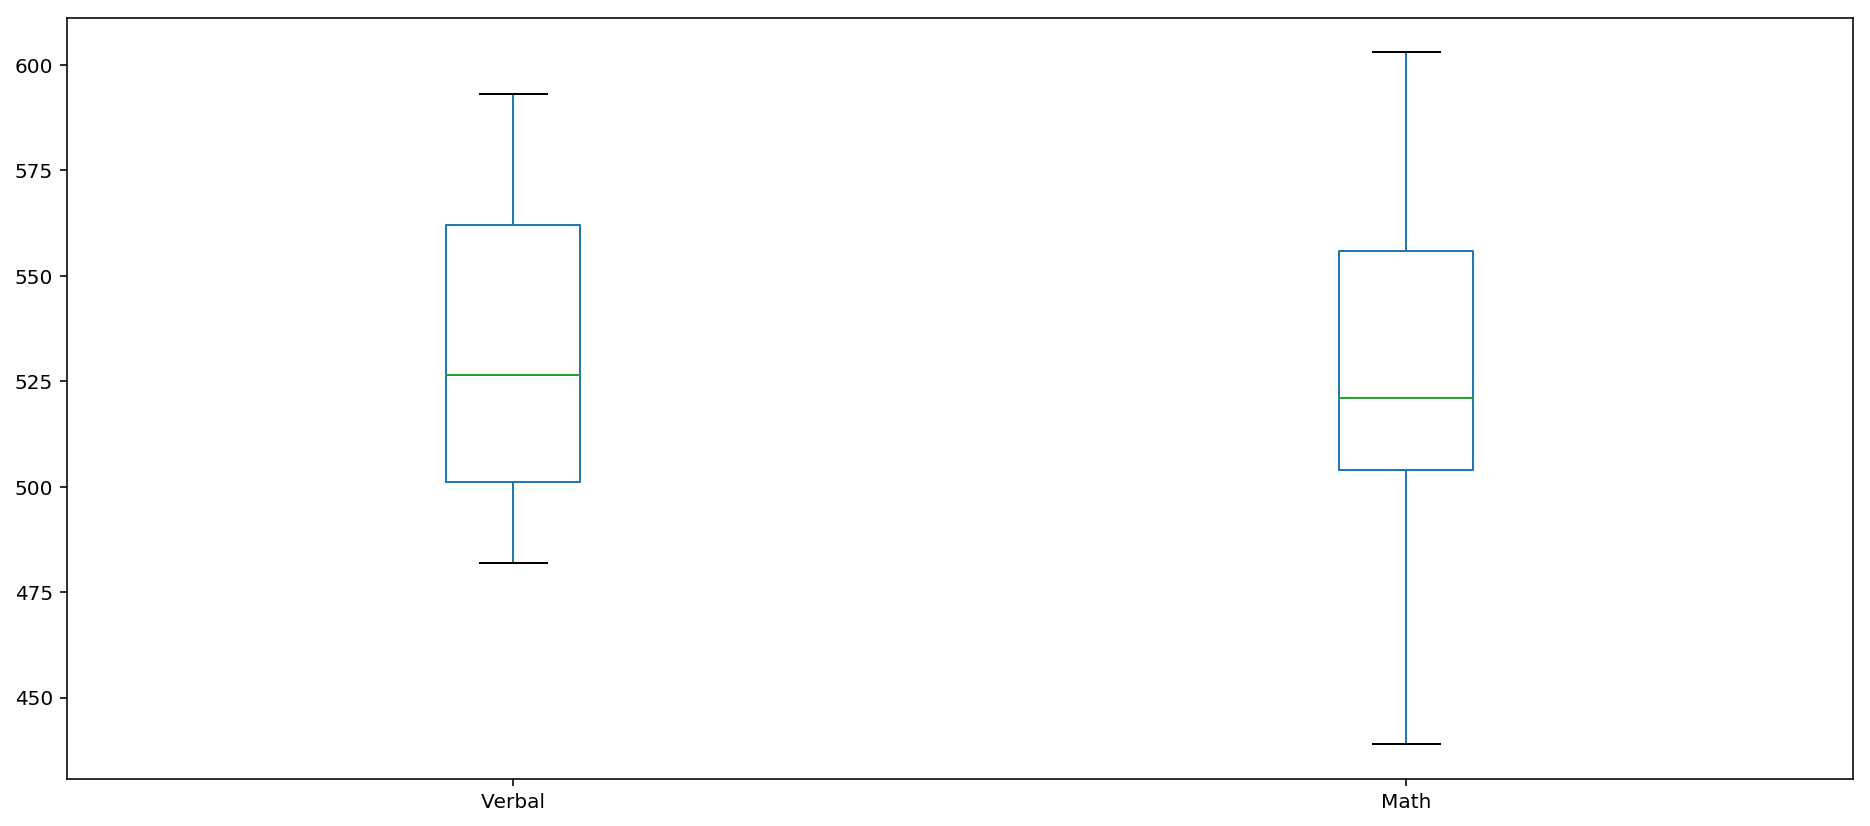

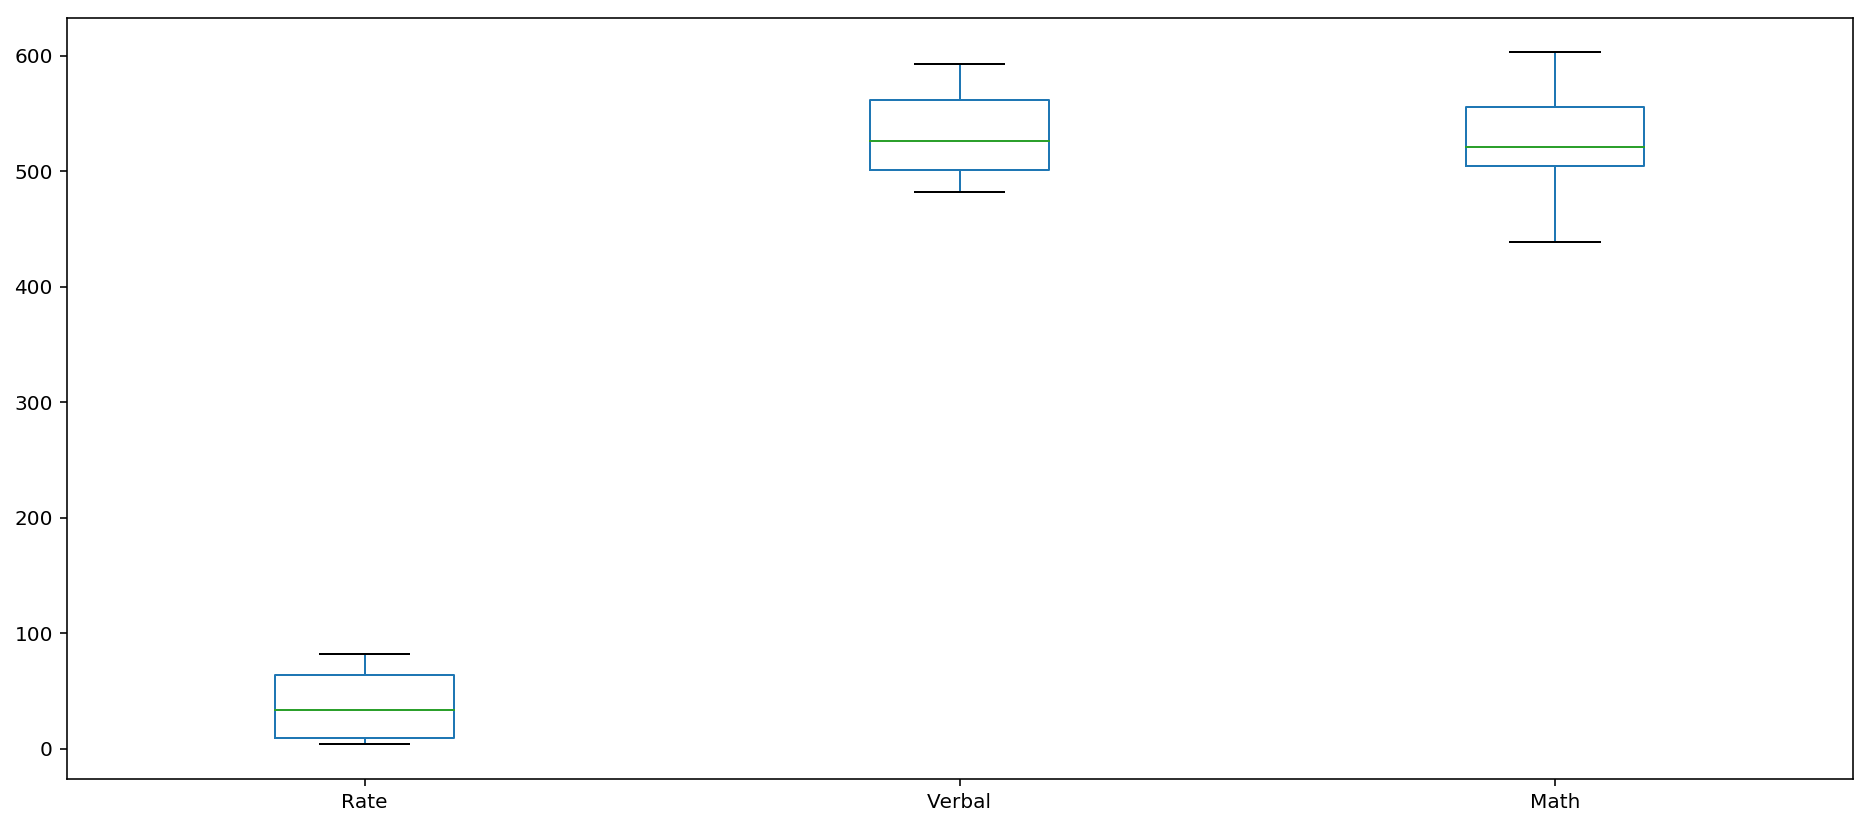

In [12]:
vermath.plot(kind='box', figsize=(16,7))
df.plot(kind='box', figsize=(16,7))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [13]:
df['Rate'].std()

27.301788072869286

In [14]:
# The only way I can compare all three columns is to standardize the values.
cols = list(df.columns)
cols.remove('State')
cols

# cols is now a list of the columns names I want to compute the z-score
df[cols] 

for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    # I'm creating 3 new columns here. 
    # For all the cols I'm adding a '_zscore', compressing it into col_zscore and creating new columns from it

In [15]:
# reassigning modifications of the data frames accordingly
df_full = df.copy() # original and z scores
df_zscore = df_full[['Rate_zscore','Verbal_zscore', 'Math_zscore']].copy() # only the z scores
df = df_full[['State', 'Rate', 'Verbal', 'Math']].copy()

In [16]:
columns_zscore = df_zscore.columns
columns_zscore

Index([u'Rate_zscore', u'Verbal_zscore', u'Math_zscore'], dtype='object')

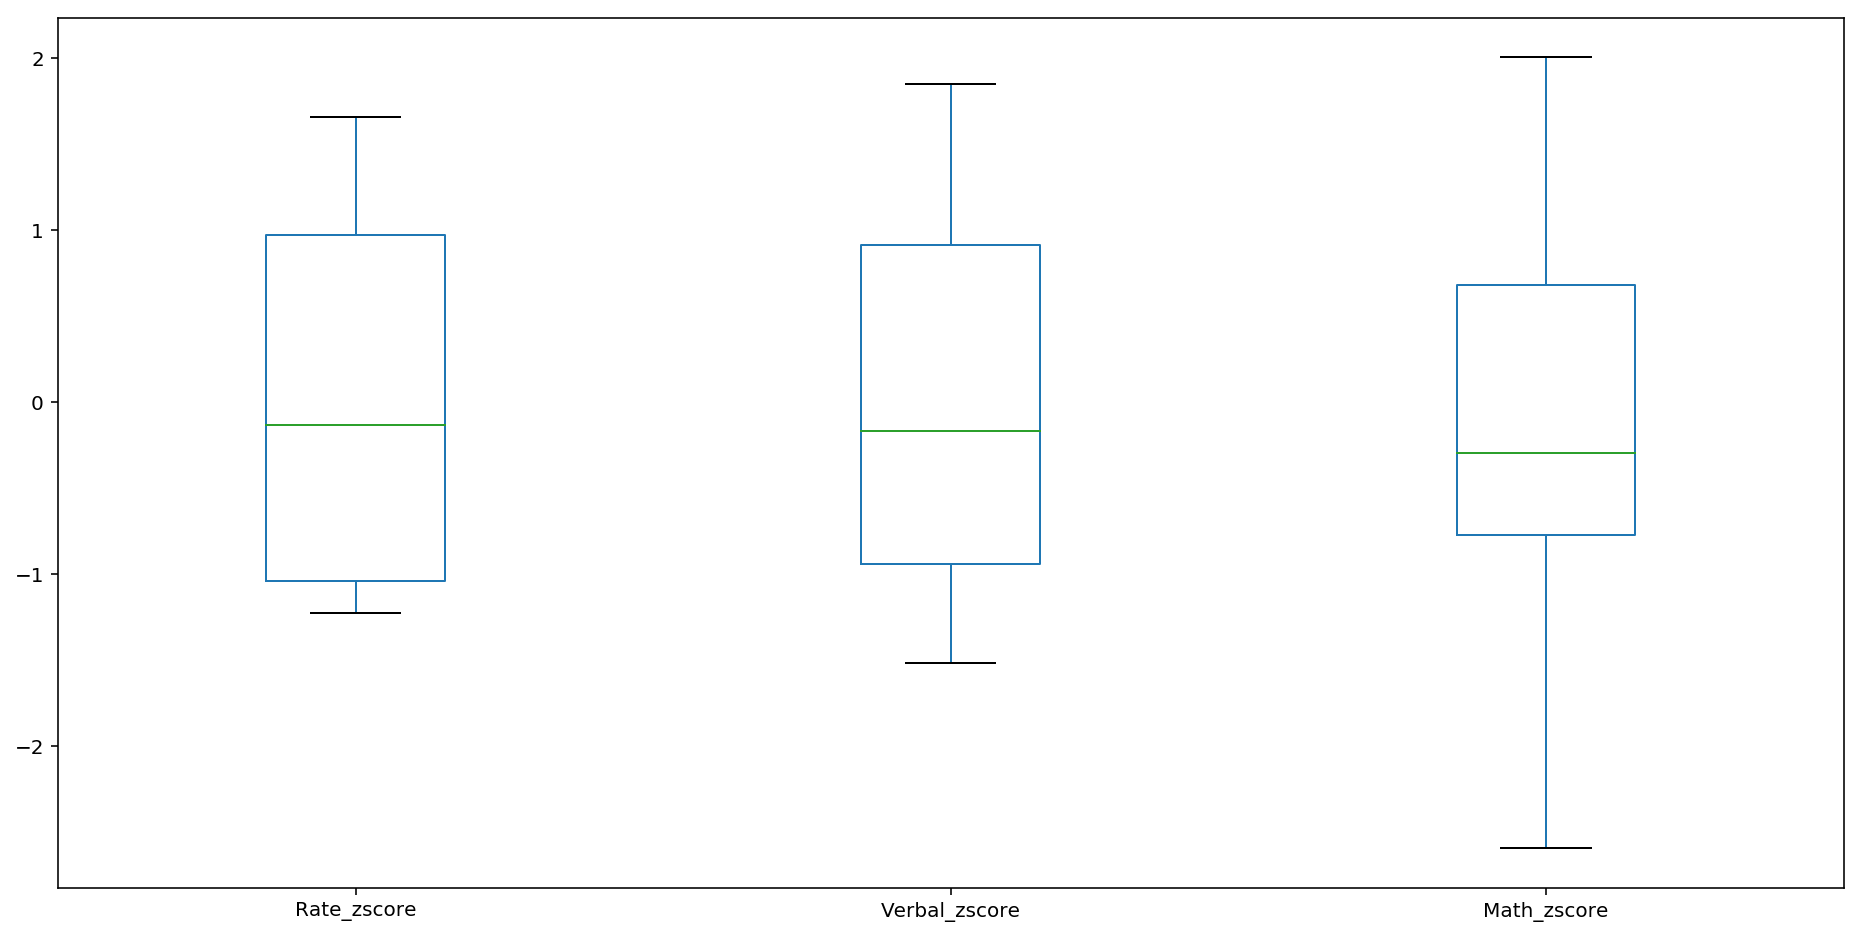

In [17]:
df_zscore = df_zscore[['Rate_zscore', 'Verbal_zscore', 'Math_zscore']]
df_zscore.plot(kind='box', figsize=(16,8))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
df['Verbal'].mean()

532.0192307692307

In [19]:
# 24 states above the mean
len(df[df['Verbal'] > df['Verbal'].mean()])

24

In [20]:
# 46 % of states are above the mean
round((24 / float(len(df))), 2)

0.46

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
df['Verbal'].median()

526.5

In [22]:
len(df[df['Verbal'] > df['Verbal'].median()])

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

#### df_verma

In [23]:
# 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math.
# new column
df['Verbal-Math'] = df['Verbal'].copy() - df['Math'].copy()
# new frame
df_verma = df[['State','Verbal-Math']].copy()
# filter > 
df_verma = df_verma[df_verma['Verbal-Math'] > 0].copy()
# sort and take the first 10
df_verma = df_verma.sort_values(by=['Verbal-Math'], ascending=False)[:10].copy()
# reset index
df_verma.reset_index(inplace=True)
# rename column
df_verma.rename(columns = {'index':'df_id'}, inplace=True)

#### df_maver

In [24]:
# 10 states with the greatest gap between Math and Verbal scores where Math is greater than Verbal.

df['Math-Verbal'] = df['Math'] - df['Verbal']
df_maver = df[['State','Math-Verbal']]
df_maver = df_maver[df_maver['Math-Verbal'] > 0]
df_maver.sort_values(by=['Math-Verbal'], ascending=False, inplace=True)
df_maver = df_maver[:10].copy() 
# I THINK THE ERROR IS HERE. WHEN I USE ILOC I WILL HAVE TO USE THE COPY. 
# ASSOCIATING A VARIABLE WITH THE ILOC FUNCTION WILL EFFECT A CHANCE IN THE ORIGINAL DATAFRAME WHEN I DO 
# SOMETHING TO THE NEW VARIABLE.
df_maver.reset_index(inplace=True)
df_maver.rename(columns= {'index':'df_id'}, inplace=True)

In [25]:
print 'VERBAL - MATH \n'
print df_verma.head(3)

print '\n MATH - VERBAL \n'
print df_maver.head(3)

VERBAL - MATH 

   df_id State  Verbal-Math
0     27    OH           95
1     29    WV           15
2     50    MS           15

 MATH - VERBAL 

   df_id State  Math-Verbal
0     21    HI           30
1     23    CA           19
2      1    NJ           14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
df_corr = df.drop(columns=['State','Verbal-Math','Math-Verbal'])
df_corr.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
df.describe()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
df_cov = df.drop(columns=['State','Verbal-Math','Math-Verbal'])
df_cov.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

                                                    ~ LOGISTICS

In [29]:
drug_df = pd.read_csv("drug-use-by-age.csv")
drug_cols = drug_df.columns

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [30]:
drug_info = {'use':'Percentage of those in an age group who used alcohol in the past 12 months',
            'frequency': 'Median number of times a user in an age group used alcohol in the past 12 months'}
drug_remember = {'1': 'Talking about usage in in the past 12 months',
                '2': 'Talking about the percentage of users within an age group',
                '3': 'Talking about the median number of times somethign has been used within an age group'}

In [31]:
drug_df.head(4)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0


In [32]:
drug_df.tail(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [33]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

#### Focus on 3 columns

In [34]:
# I want to focus only on alcohol, marijuana and cocain
almaco = drug_df.iloc[:,:8].drop(columns='n')
almaco_cols = almaco.columns
almaco_cols

Index([u'age', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency'],
      dtype='object')

#### Cleaning up cocaine-frequency

In [35]:
# Replacing the dash to np.nan - all cells.
almaco = almaco.apply(lambda x: x.replace('-', np.nan))
# changing the data type in the series (there isn't an inplace function)
almaco['cocaine-frequency'] = almaco['cocaine-frequency'].astype('float')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [36]:
almaco.columns

Index([u'age', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency'],
      dtype='object')

In [37]:
almaco = almaco.set_index('age')

In [38]:
almaco

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency
age,,,,,,
12,3.9,3.0,1.1,4.0,0.1,5.0
13,8.5,6.0,3.4,15.0,0.1,1.0
14,18.1,5.0,8.7,24.0,0.1,5.5
15,29.2,6.0,14.5,25.0,0.5,4.0
16,40.1,10.0,22.5,30.0,1.0,7.0
17,49.3,13.0,28.0,36.0,2.0,5.0
18,58.7,24.0,33.7,52.0,3.2,5.0
19,64.6,36.0,33.4,60.0,4.1,5.5
20,69.7,48.0,34.0,60.0,4.9,8.0


In [39]:
# Since use and frequency are in different units, am separating them to analyze them separately. 
almaco_use = almaco[['alcohol-use','marijuana-use','cocaine-use']]
almaco_freq = almaco[['alcohol-frequency','marijuana-frequency','cocaine-frequency']]

#### bar plot

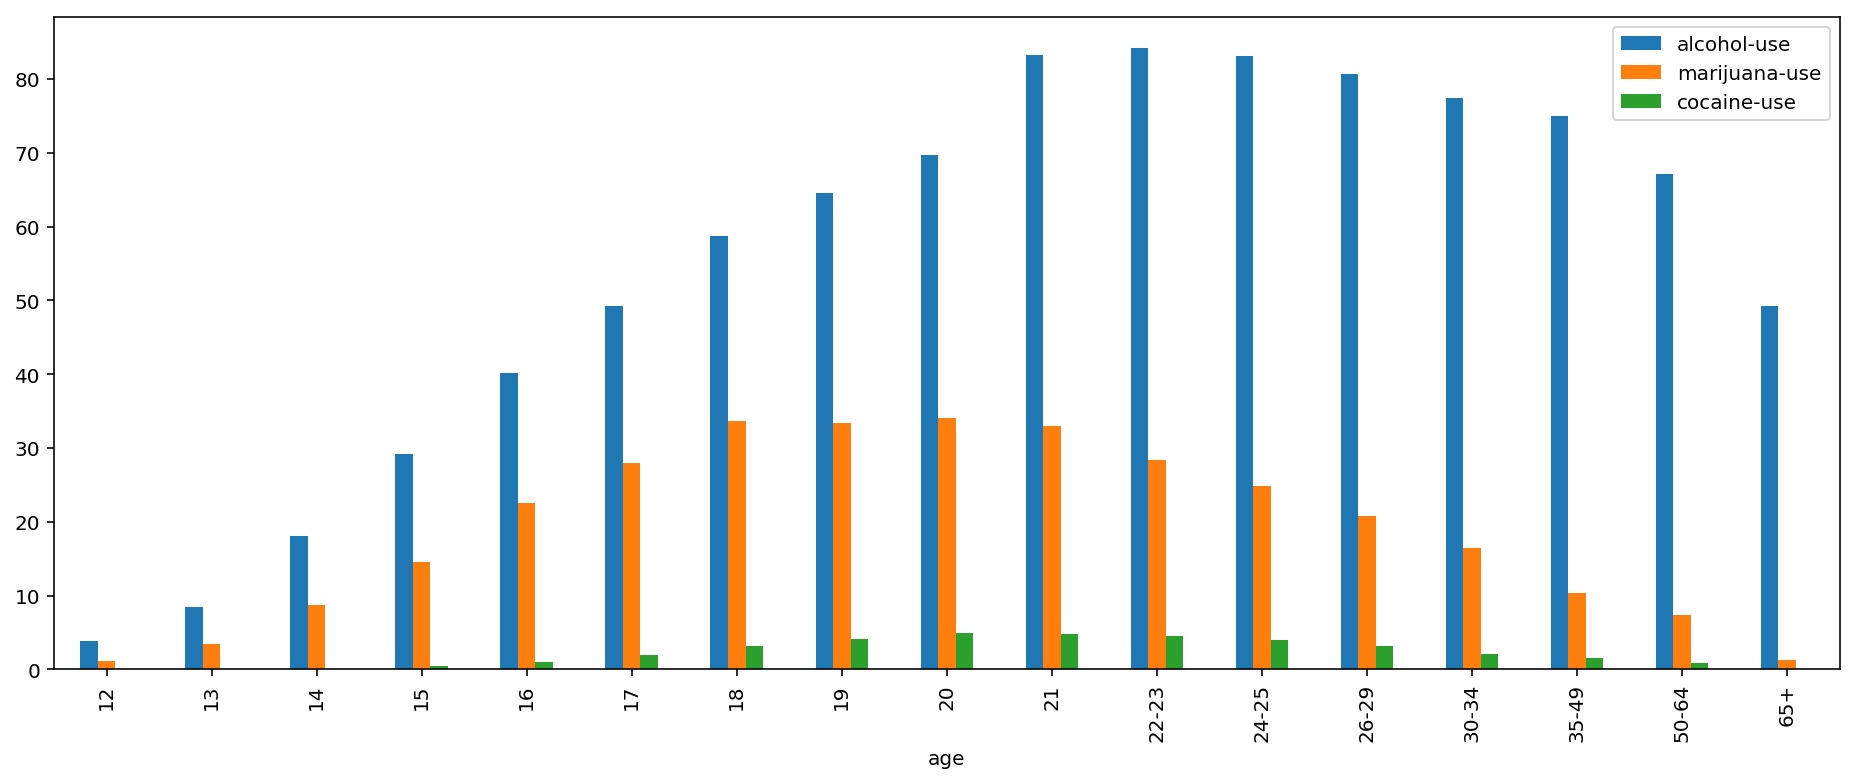

In [40]:
almaco_use.plot(kind='bar', figsize=(16,6))

#### bar plot

Text(0.5,0,u'AGE')

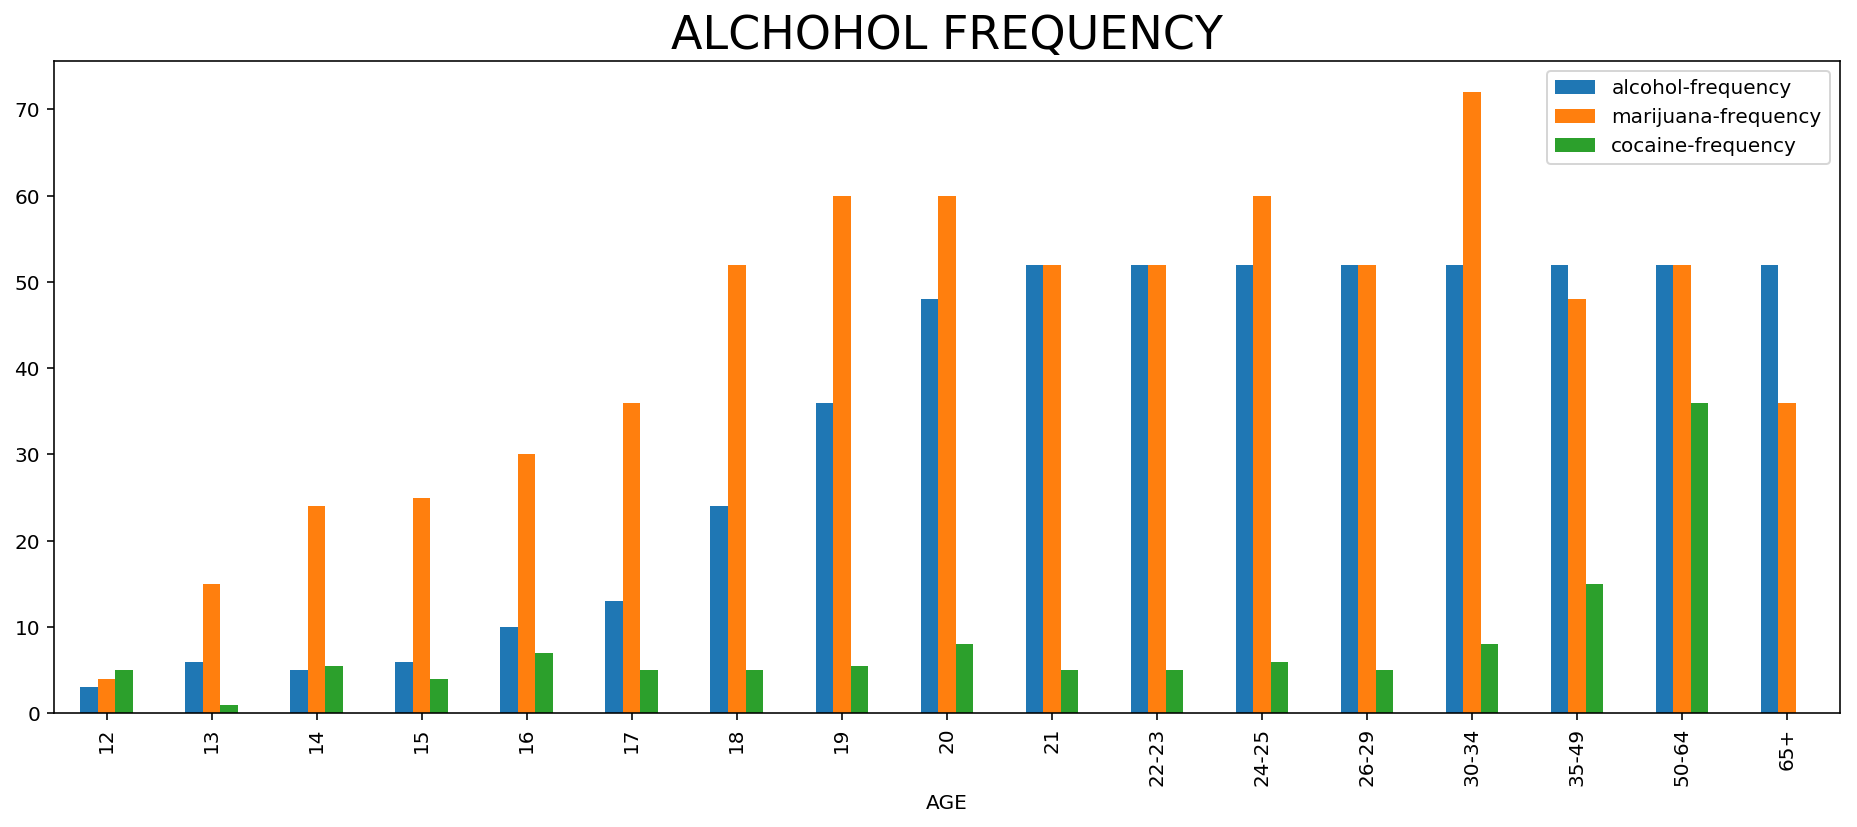

In [41]:
almaco_freq.plot(kind='bar', figsize=(16,6), fontsize=10)
plt.title('ALCHOHOL FREQUENCY', fontsize=23)
plt.xlabel('AGE')

#### pairplot

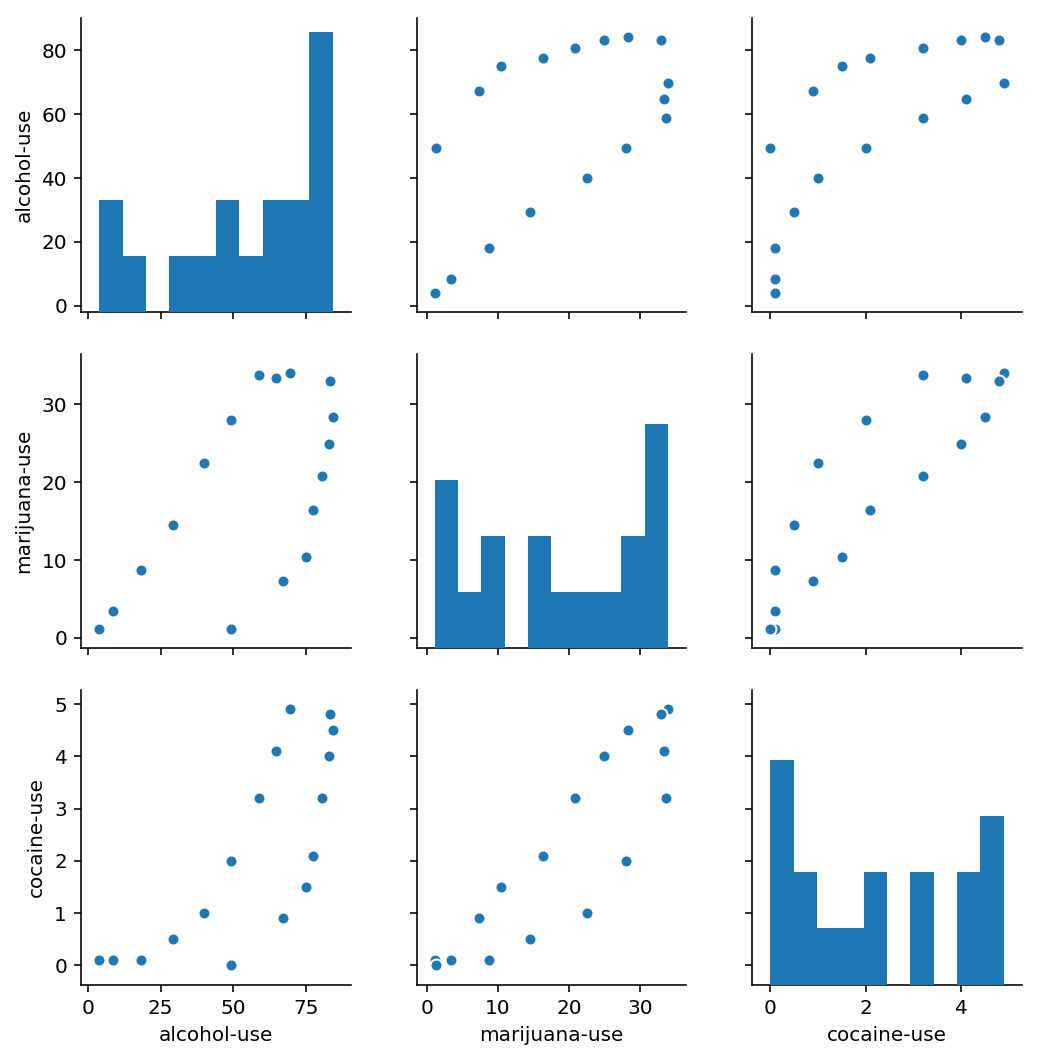

In [42]:
sns.pairplot(almaco_use)

#### pairplot

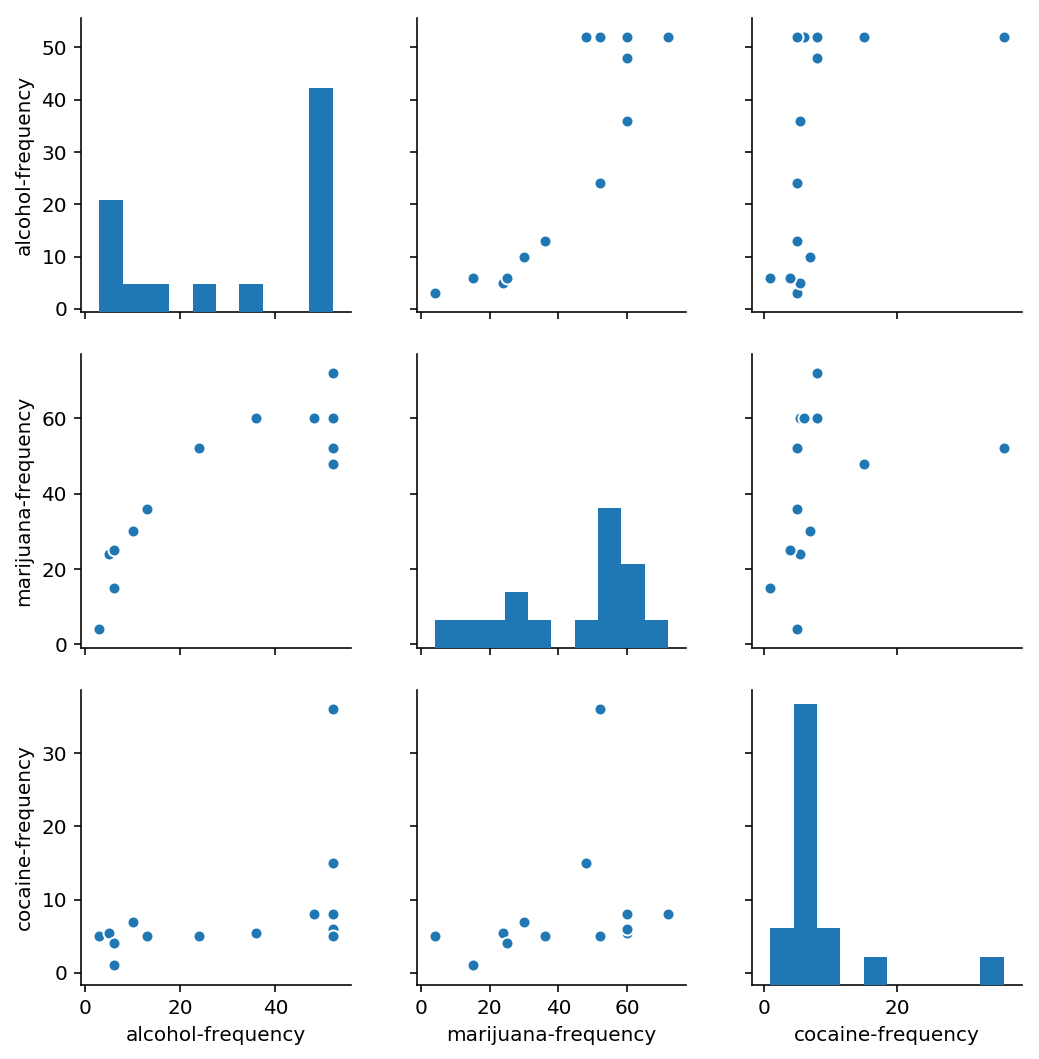

In [43]:
# I have to drop that row in order to plot this damn pair plot. It needs that np.nan cell filled.
almaco_freq_drop = almaco_freq.drop('65+', axis=0)
sns.pairplot(almaco_freq_drop)

In [44]:
almaco_use.corr()

,alcohol-use,marijuana-use,cocaine-use
alcohol-use,1.000000,0.594165,0.773458
marijuana-use,0.594165,1.000000,0.883789
cocaine-use,0.773458,0.883789,1.000000


In [45]:
almaco_freq.corr()

,alcohol-frequency,marijuana-frequency,cocaine-frequency
alcohol-frequency,1.000000,0.818769,0.391981
marijuana-frequency,0.818769,1.000000,0.250348
cocaine-frequency,0.391981,0.250348,1.000000


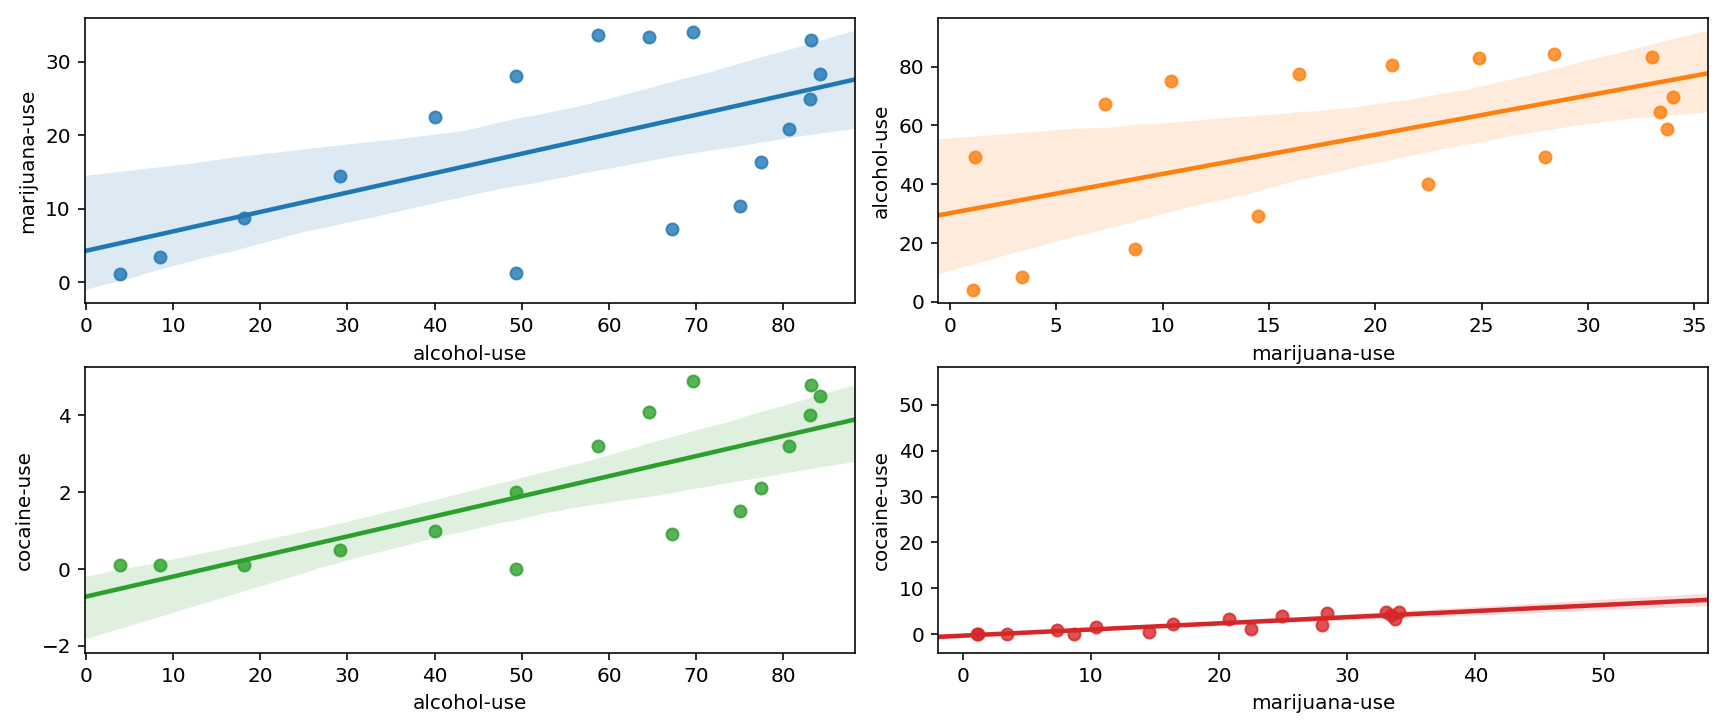

In [46]:
almar_corr =  almaco_use['alcohol-use'].corr(almaco_use['marijuana-use'])

fig, axes = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()
ax1 = sns.regplot(data=almaco_use, x='alcohol-use', y='marijuana-use', ax=axes[0][0])
ax2 = sns.regplot(data=almaco_use, x='marijuana-use', y='alcohol-use', ax=axes[0][1])
ax3 = ax1 = sns.regplot(data=almaco_use, x='alcohol-use', y='cocaine-use', ax=axes[1][0])
ax4 = ax1 = sns.regplot(data=almaco_use, x='marijuana-use', y='cocaine-use', ax=axes[1][1])

plt.show()

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [70]:
df_rate = df[['Rate']].copy()
print df_rate.mean()
print df_rate.std()
print df_rate.min()
print df_rate.max()
df_rate['Rate_zscore'] = (df_rate  - df_rate.mean()) / df_rate.std()

Rate    37.153846
dtype: float64
Rate    27.301788
dtype: float64
Rate    4
dtype: int64
Rate    82
dtype: int64


In [63]:
df_rate['Rate_zscore'] = df_rate['Rate_zscore'].apply(lambda x: round(x, 2))
df_rate.sort_values('Rate_zscore', ascending=True, inplace=True)

print df_rate

# Filtering out the data points that have a z-score above 1.5 i.e the data point's distance from the mean is 
# 1.5 x the standard deviation (average distance a point is from the mean.)
df_rate[(df_rate['Rate_zscore'] > 1.5) | (df_rate['Rate_zscore'] < -1.5)]


    Rate  Rate_zscore
49     4        -1.21
48     4        -1.21
50     4        -1.21
47     5        -1.18
46     5        -1.18
45     6        -1.14
44     6        -1.14
43     7        -1.10
42     8        -1.07
41     8        -1.07
40     8        -1.07
38     9        -1.03
39     9        -1.03
37     9        -1.03
36    11        -0.96
35    11        -0.96
34    12        -0.92
33    12        -0.92
32    13        -0.88
31    13        -0.88
30    17        -0.74
29    18        -0.70
28    23        -0.52
27    26        -0.41
26    31        -0.23
25    33        -0.15
24    34        -0.12
51    45         0.29
22    51         0.51
23    51         0.51
21    52         0.54
20    53         0.58
19    53         0.58
18    54         0.62
17    55         0.65
16    56         0.69
15    57         0.73
14    60         0.84
13    63         0.95
11    65         1.02
12    65         1.02
10    67         1.09
9     68         1.13
8     69         1.17
7     69  

,Rate,Rate_zscore
2,79,1.53
1,81,1.61
0,82,1.64


#### df_rate['Rate_zscore']

In [49]:
rate_drop_outlier = df_rate.drop(axis=0, index=[0,1,2])

#### Mean

In [50]:
print rate_drop_outlier.mean()
print '==='
print df_rate.mean()

Rate           34.489796
Rate_zscore    -0.096939
dtype: float64
===
Rate           37.153846
Rate_zscore     0.000577
dtype: float64


#### Median

In [51]:
print rate_drop_outlier.median()
print '==='
print df_rate.median()

Rate           31.00
Rate_zscore    -0.23
dtype: float64
===
Rate           33.500
Rate_zscore    -0.135
dtype: float64


#### Standard deviation 

In [52]:
print rate_drop_outlier.std()
print '==='
print df_rate.std()

Rate           25.812725
Rate_zscore     0.945554
dtype: float64
===
Rate           27.301788
Rate_zscore     0.999985
dtype: float64


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


#### Visualizing to get a feel first

0.9


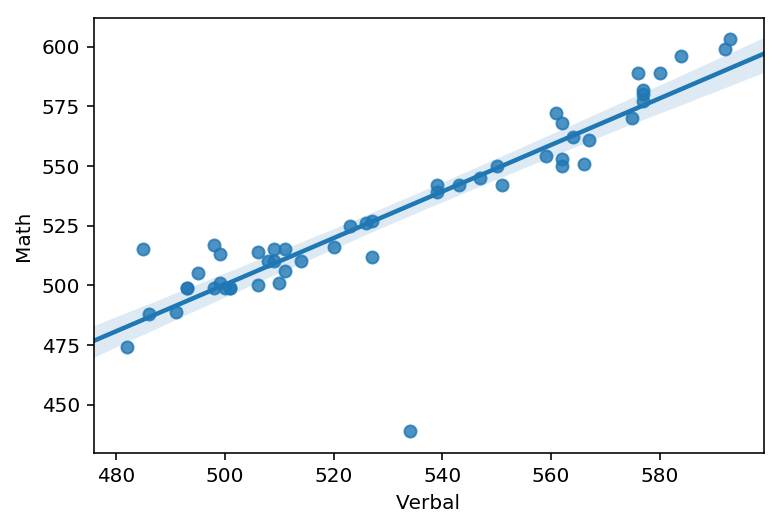

In [53]:
# Verbal against Math
sns.regplot(data=df, x='Verbal', y='Math')
print round(df['Verbal'].corr(df['Math']),3)

0.9


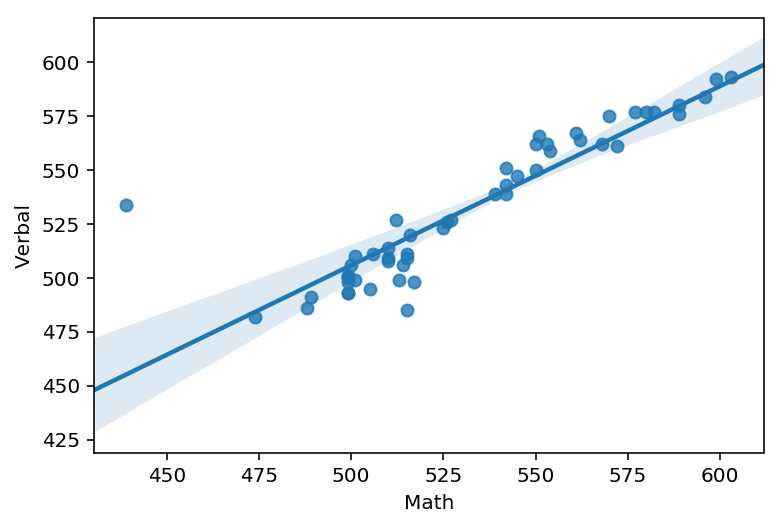

In [54]:
# Math against Verbal
sns.regplot(data=df, x='Math', y='Verbal')
print round(df['Math'].corr(df['Verbal']),3)

#### Pearson correlation

In [55]:
df.corr()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
Rate,1.000000,-0.886432,-0.773746,-0.101412,0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600,-0.052600
Math,-0.773746,0.899871,1.000000,-0.388219,0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000,-1.000000
Math-Verbal,0.101412,-0.052600,0.388219,-1.000000,1.000000


#### Spearman correlation - Stats library way

In [56]:
stats.spearmanr(verbal, math)

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

#### Spearman correlation - Pandas library way

In [78]:
df.corr(method='spearman')

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
Rate,1.000000,-0.833294,-0.813275,-0.014266,0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244,-0.060244
Math,-0.813275,0.905205,1.000000,-0.239883,0.239883
Verbal-Math,-0.014266,0.060244,-0.239883,1.000000,-1.000000
Math-Verbal,0.014266,-0.060244,0.239883,-1.000000,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

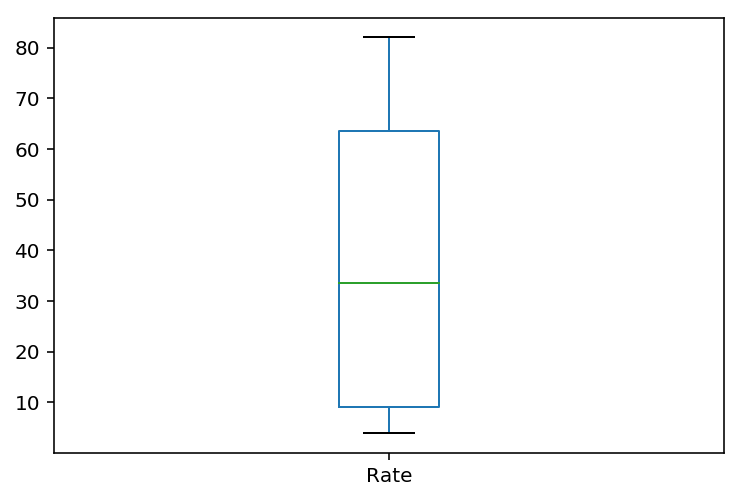

In [57]:
df['Rate'].plot(kind='box')

In [76]:
rate_percentile = df[['State','Rate']].copy()
rate_percentile['% of max score'] = df[['Rate']].rank(pct=True)
rate_percentile[rate_percentile['State'] == 'CA']

,State,Rate,% of max score
23,CA,51,0.567308


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [77]:
df_full['% of max score'] = rate_percentile['% of max score'].copy()
df_full.head(20)


,State,Rate,Verbal,Math,Rate_zscore,Verbal_zscore,Math_zscore,Rate_percentile,% of max score
0,CT,82,509,510,1.658635,-0.699352,-0.602798,1.000000,1.000000
1,NJ,81,499,513,1.621650,-1.003164,-0.518687,0.980769,0.980769
2,MA,79,511,515,1.547680,-0.638589,-0.462613,0.961538,0.961538
3,NY,77,495,505,1.473710,-1.124689,-0.742984,0.942308,0.942308
4,NH,72,520,516,1.288785,-0.365159,-0.434575,0.923077,0.923077
5,RI,71,501,499,1.251800,-0.942401,-0.911207,0.894231,0.894231
6,PA,71,500,499,1.251800,-0.972783,-0.911207,0.894231,0.894231
7,VT,69,511,506,1.177830,-0.638589,-0.714947,0.855769,0.855769
8,ME,69,506,500,1.177830,-0.790495,-0.883169,0.855769,0.855769
9,VA,68,510,501,1.140845,-0.668971,-0.855132,0.826923,0.826923


#### Why might percentile scoring be useful for dealing with outliers?

#### Plot the distribution of a variable of your choice from the drug use dataset.

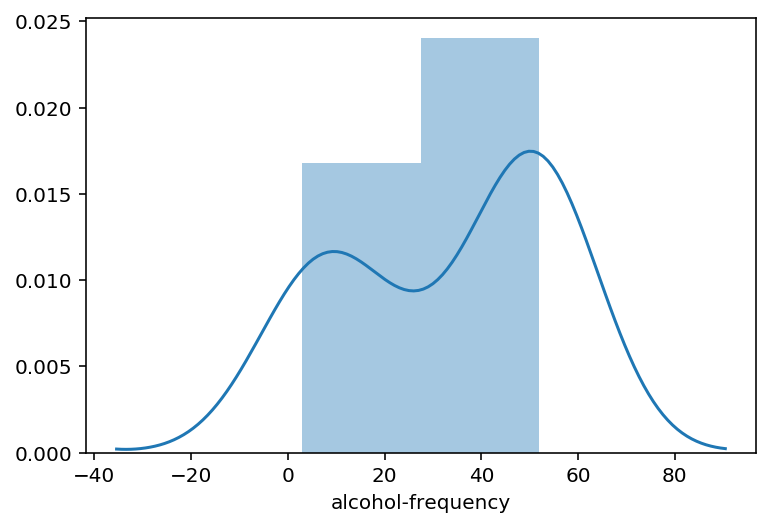

In [60]:
sns.distplot(drug_df['alcohol-frequency'])

#### Plot the same variable but percentile scored.

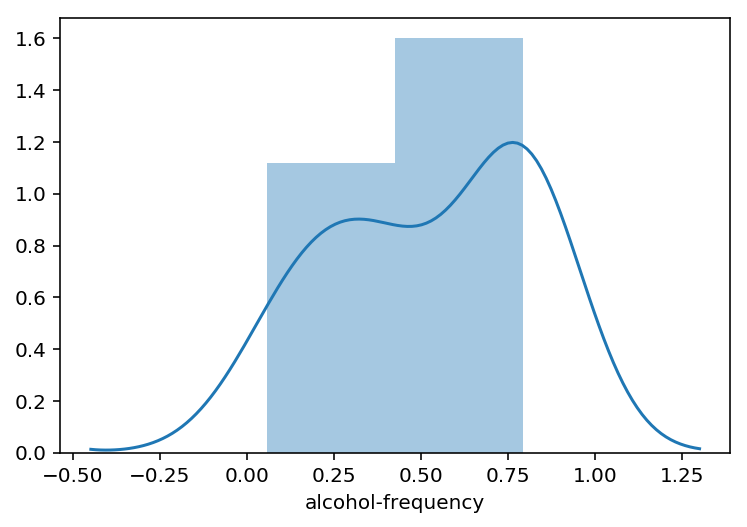

In [73]:
sns.distplot(drug_df['alcohol-frequency'].rank(pct=True))

#### Describe the effect, visually, of coverting raw scores to percentile.

                                                ~ LEARNINGS

                                                ~ RE-DO

                                             ~ BEST PRACTICE

                                             ~ LEFT UNSETTLED